El análisis de la calidad del vino es fundamental para la industria vinícola, ya que permite comprender y optimizar los procesos de producción para obtener un producto final de alta calidad. En este proyecto, se utiliza el dataset "Wine Quality", que contiene un conjunto de variables químicas y sensoriales que influyen en la calidad del vino. Estas variables incluyen la acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre y total, densidad, pH, sulfatos, y alcohol, junto con una puntuación de calidad asignada por catadores expertos.

El objetivo principal de este proyecto es explorar las relaciones entre estas variables y determinar cuáles tienen el mayor impacto en la calidad del vino. Para ello, se llevarán a cabo análisis para identificar patrones y correlaciones dentro de los datos. Estas visualizaciones permitirán formular y probar hipótesis sobre cómo las diferentes propiedades químicas del vino afectan su calidad percibida.

¿Qué variables químicas están más estrechamente relacionadas con la calidad del vino? ¿Existen umbrales específicos de estas variables que se asocian con calificaciones de calidad más altas? A través de un análisis estadístico y la creación de visualizaciones detalladas, se espera obtener una comprensión más profunda de los factores que contribuyen a la calidad del vino, proporcionando así información valiosa para enólogos y productores de vino así como también a aquellos simples aficionados que desean elegir una buena botella para degustar y no conocen mucho del rubro. Dado que algunos de estos datos quedan detallados en la etiqueta, podría ser de gran ayuda al momento de la elección.

In [1]:
#Importamos librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Cargamos el dataframe desde la ruta de acceso que en mi caso es en mi disco personal
# Cargamos los datos
df = pd.read_csv("https://raw.githubusercontent.com/NicoLencina95/ProyectoFinalDataScience/main/winequality-red.csv")

#Vemos la composición del dataframe por medio de 'describe' que da un panorama de como esta compuesta cada columna
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [3]:
#Buscamos una descripción del tipo de cada columna y la cantidad de datos que contienen 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
#Para determinar qué columnas nos sirven para los análisis chequeamos qué cantidad de datos vacíos hay en cada una
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

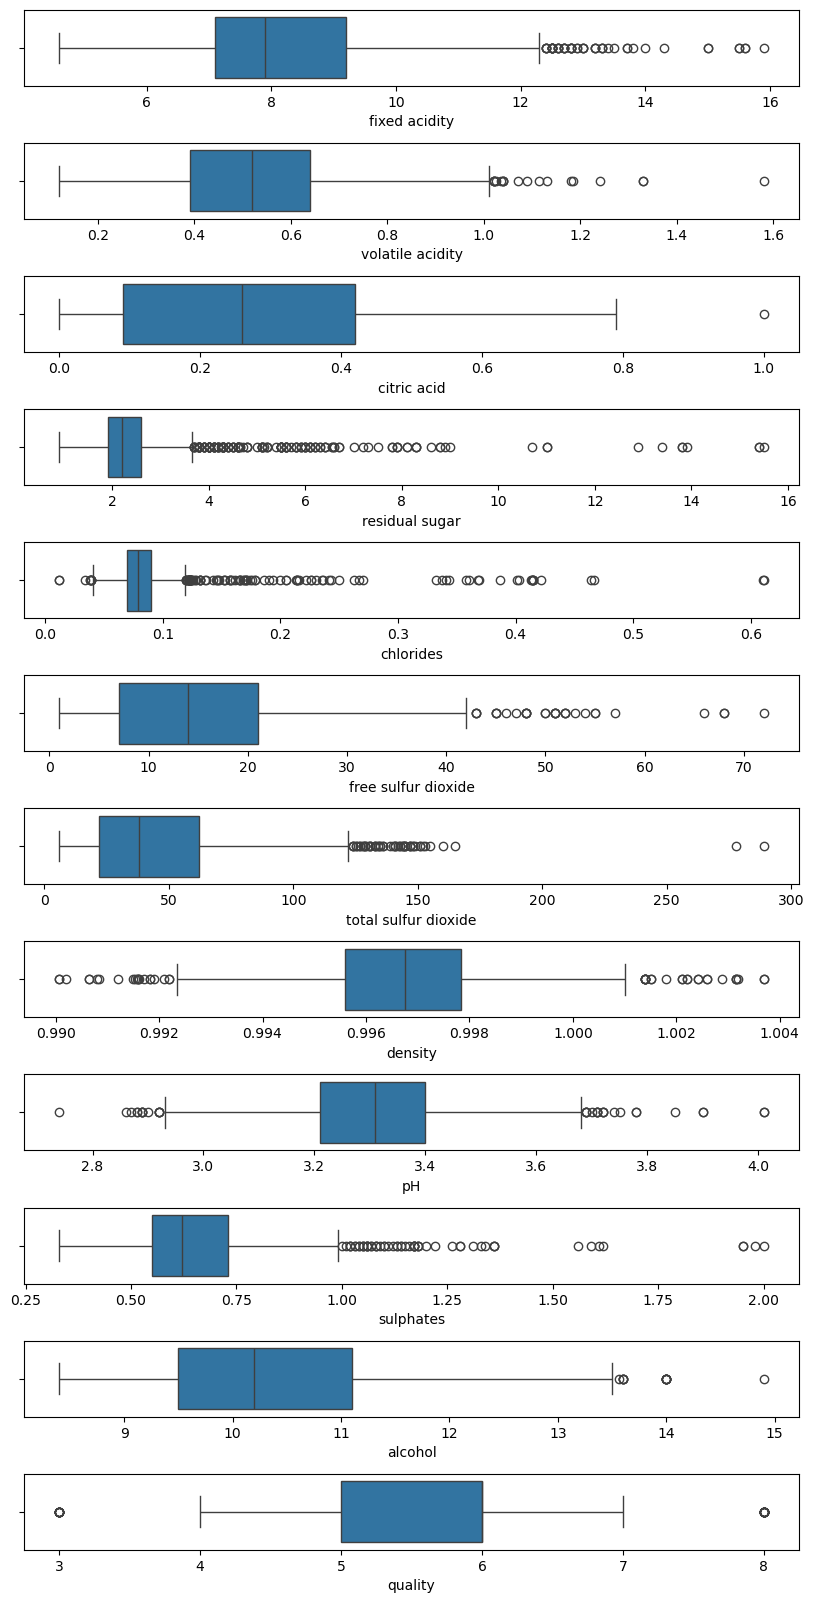

In [5]:
#Lo próximo a realizar es la eliminación de valores outliers. Para esto debemos chequear que los valores del dataframe corresponden a las unidades 
# preestablecidas para ese parámetro y que los valores que posee están dentro del rango aceptado
#Por medio de gráficos de boxplot podemos calcular para cada variables cómo se distribuyen sus datos y si existen valores por fuera del rango aceptado.

fig,axis=plt.subplots(12,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.75)
for i in range(12):
    sns.boxplot(x=df.columns[i],data=df,ax=axis[i])

In [ ]:
#A través del gráfico anterior, podemos remarcar que las variables fixed acidity, chlorides y free sulphur dioxide poseen valores outliers que no deberían ser considerados por peligros de toxicidad. Procedemos a eliminarlos

In [6]:
# Definimos de los valores esperados para cada variable
rangos = {
    'fixed acidity': (4, 15),  # g/L
    'chlorides': (0.01, 0.2),  # g/L
    'free sulfur dioxide': (1, 50)  # mg/L
}

# Función para eliminar outliers
def eliminar_outliers(df, variable, min_val, max_val):
    return df[(df[variable] >= min_val) & (df[variable] <= max_val)]

# Eliminar outliers de 'fixed acidity'
df = eliminar_outliers(df, 'fixed acidity', rangos['fixed acidity'][0], rangos['fixed acidity'][1])

# Eliminar outliers de 'chlorides'
df = eliminar_outliers(df, 'chlorides', rangos['chlorides'][0], rangos['chlorides'][1])

# Eliminar outliers de 'free sulfur dioxide'
df = eliminar_outliers(df, 'free sulfur dioxide', rangos['free sulfur dioxide'][0], rangos['free sulfur dioxide'][1])

# Verificar la cantidad de datos restantes después de eliminar outliers
print(df.shape)


(1540, 12)


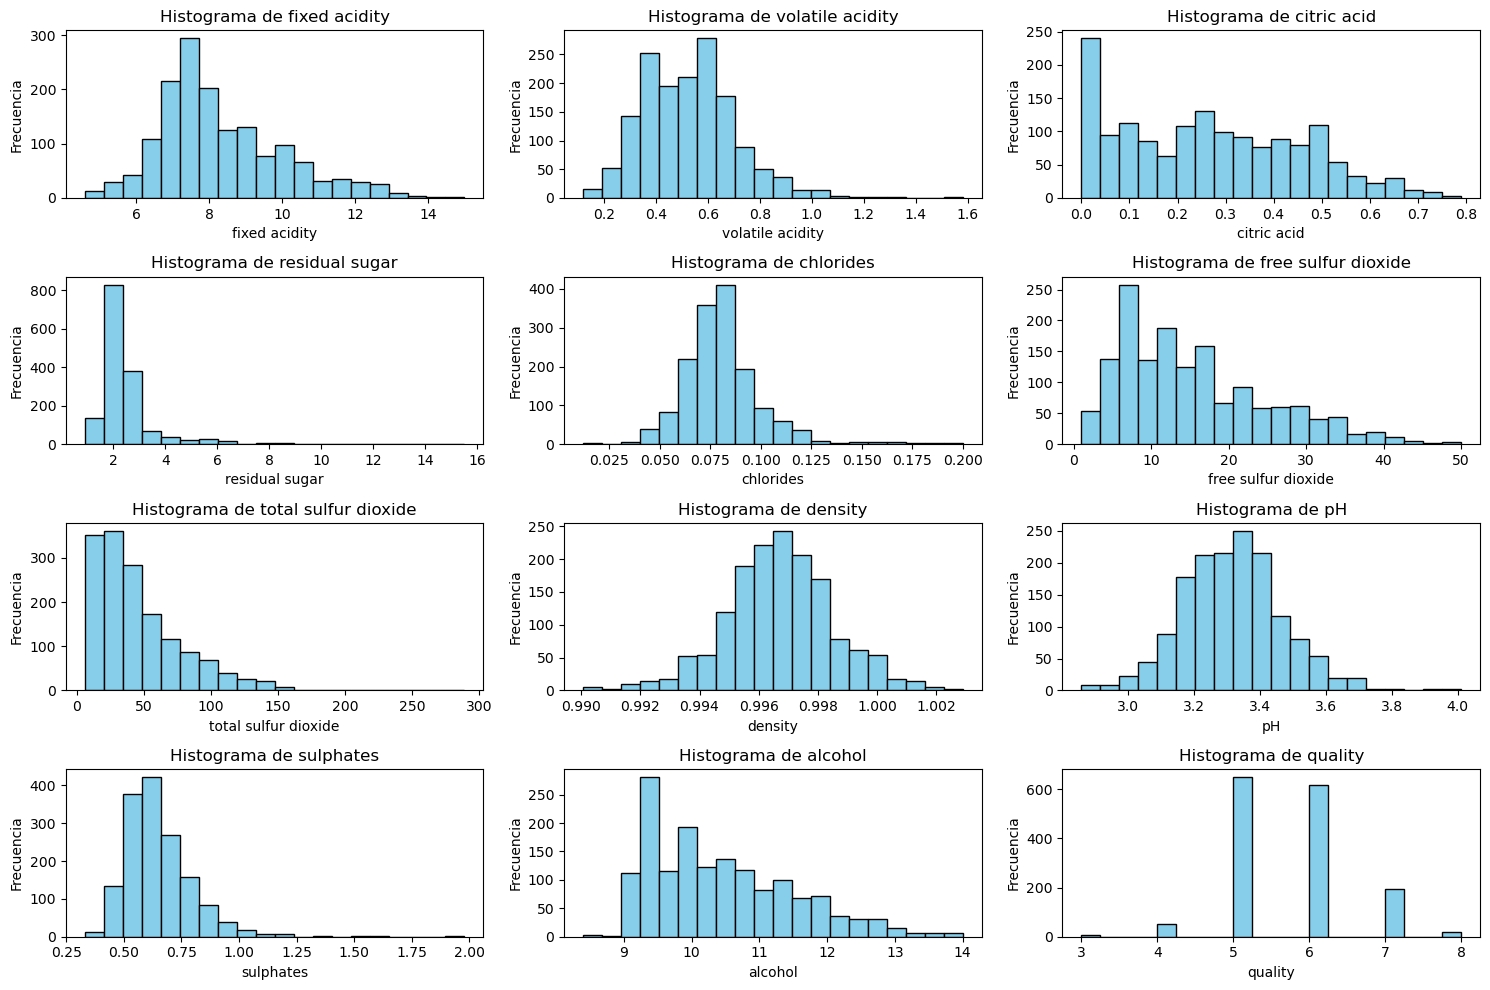

In [7]:
#El siguiente paso es determinar de qué forma se distribuyen los datos de cada variable lo cual podemos ver a través de gráficos de histograma

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol', 'quality']

# Tamaño de la figura
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)  # Organizar los gráficos en una cuadrícula de 4x3
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')  # Puedes ajustar el número de bins
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

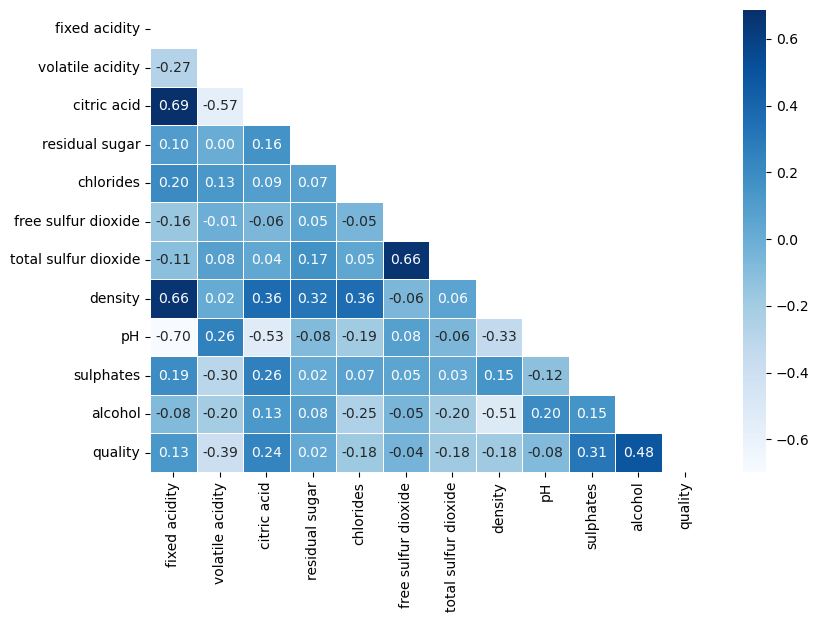

In [8]:
#Como vimos en el gráfico anterior, no todas las variables tienen una distribución normal por lo que debemos tenerlo en cuenta al momento de analizar estos datos
#Podemos buscar posibles correlaciones entre las variables e inferir cuales son importantes a considerar para establecer una buena calidad de vino (Usamos el método spearman que no considera distribución normal)
'''correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables del Vino')
plt.show()'''"Proyecto final agua limpia.ipynb"

corr = df.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Blues', mask=np.triu(corr))
plt.show()

El gráfico de correlación nos dice cómo varía los datos en relación a otro. Si nos centramos en la variable de calidad de vinos (quality) podemos ver que tiene una correlación negativa con 
la acides volatil, cloruros, dioxidos de azufre libres y totales y la densidad. Por otro lado, tiene una correlación posittiva con la acides, el ácido cítrico agregado,
sulfatos y por sobre todo, con el alcohol.
Si deseamos conocer qué valores en esas variables tienen mayor tenedencia a una mejor calidad de vino podemos verlo a través de un box plot clasificado por niveles de calidad

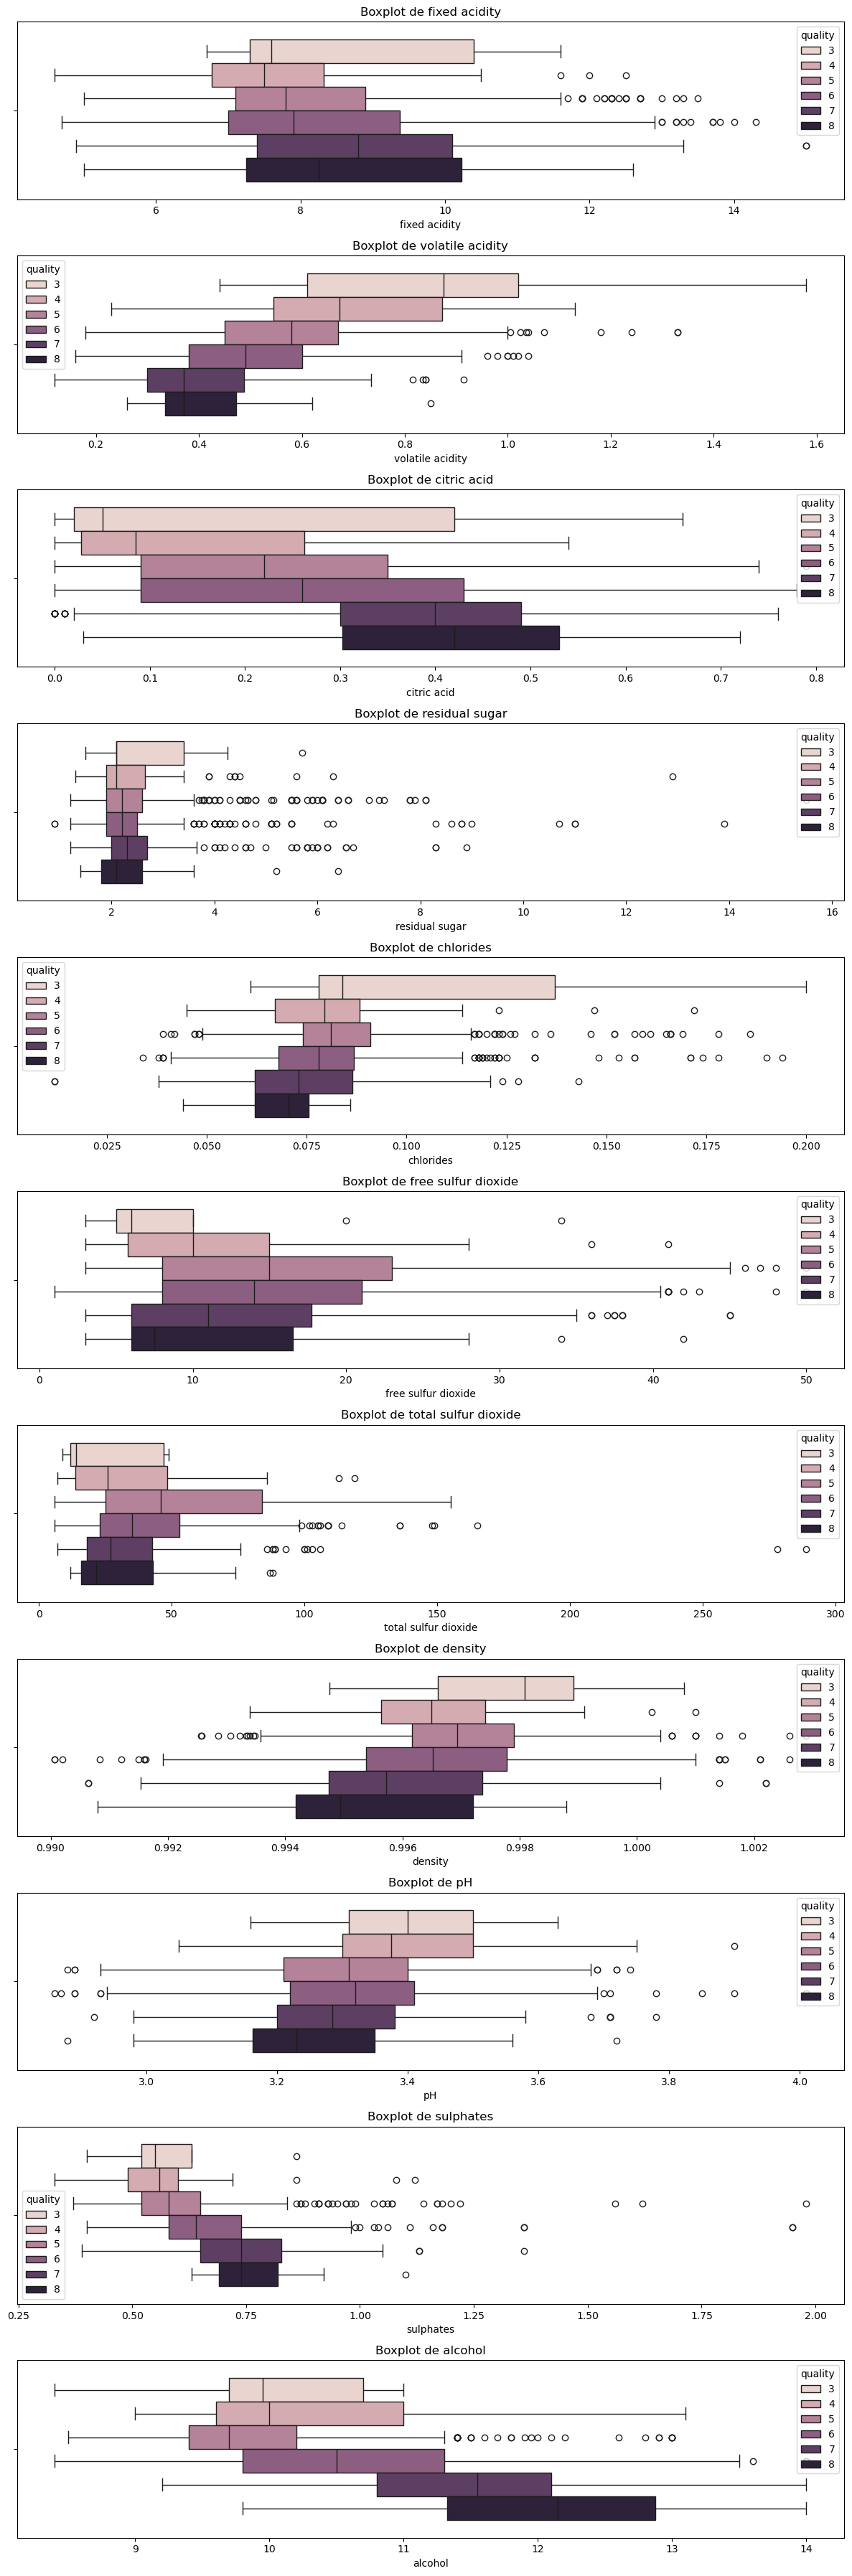

In [9]:
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(12, 36))

#Espacio entre los subgráficos
fig.subplots_adjust(hspace=0.5)  #Espacio vertical entre los gráficos

# Grafica un boxplot para cada variable
for i, column in enumerate(df.columns[:11]):
    sns.boxplot(x=df[column], hue='quality', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

# Ajusta los títulos y etiquetas para que no se sobrepongan
plt.tight_layout()
plt.show()

Por medio de este gráfico podemos corroborar lo antes mencionado acerca de las variables que se correlacionan positiva o negativamente con la calidad del vino. Podríamos inferir que las variables que más afectan en la calidad 
del vino de mayor a menor medida son las siguientes:

In [10]:
correlation_spearman = df.corr(method='spearman')

quality_correlation = correlation_spearman['quality']

# Ordenar las variables según la correlación con 'quality', de mayor a menor
sorted_correlation = quality_correlation.sort_values(ascending=False)

# Crear una lista de variables ordenadas por su correlación con 'quality'
variable_list = sorted_correlation.index.tolist()

print("Variables ordenadas según su influencia en la calidad del vino:")
for variable in variable_list:
    print(f'{variable}: {sorted_correlation[variable]:.2f}')

Variables ordenadas según su influencia en la calidad del vino:
quality: 1.00
alcohol: 0.48
sulphates: 0.40
citric acid: 0.22
fixed acidity: 0.12
residual sugar: 0.03
free sulfur dioxide: -0.05
pH: -0.06
density: -0.18
chlorides: -0.18
total sulfur dioxide: -0.19
volatile acidity: -0.38


Considerando la información que contienen las etiquetas de botellas de vino, solo podríamos conocer el porcentaje de alcohol y la presencia de sulfitos. Conociendo estos datos podemos llegar a diferenciar un vino de calidad respecto a otro que nó. Sin embargo debemos saber que esta información no es excluyente ya que otras variables que aquí no se han considerado podrían mejorar la calidad del vino como el tipo de barrica utilizada, el tiempo de barrica que se le ha dado al vino, el varietal de la uva utilizada, etc. Este análisis permite un mejor comprendimiento de las variables sobre el momento de elaboración del vino y podría ser de utilidad para productores emergentes que deseen apostar por su calidad.
A continuación se realizó el entrenamiento de un modelo supervisado de clasificación donde fueron consideradas todas las variables para su entrenamiento y la variable quality fue dividida en dos categorias, malo para valores de 3 a 5 y bueno para valores de 6 a 8:

Reporte de Clasificación:

              precision    recall  f1-score   support

       bueno       0.75      0.77      0.76       166
        malo       0.72      0.70      0.71       142

    accuracy                           0.74       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.74      0.74      0.74       308



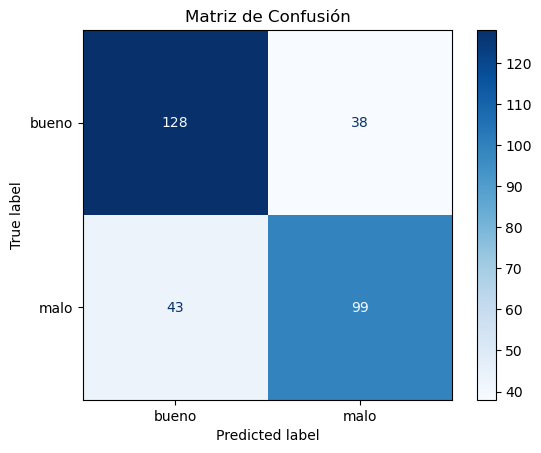

In [11]:
# Transformar la variable 'quality' en dos categorías: 3-5 = malo, 6-8 = bueno
df['quality_label'] = pd.cut(df['quality'], bins=[2, 5, 8], labels=['malo', 'bueno'])

# Eliminar filas con valores NaN si los hay
df.dropna(inplace=True)

# Convertir las etiquetas categóricas en valores numéricos
le = LabelEncoder()
df['quality_label_encoded'] = le.fit_transform(df['quality_label'])

# Seleccionar todas las variables (excepto quality_label y quality_label_encoded)
X = df.drop(columns=['quality', 'quality_label', 'quality_label_encoded'])
y = df['quality_label_encoded']  # Usar las etiquetas numéricas

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

# Normalizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))



# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriz de Confusión')
plt.show()



Como entendemos estas métricas

Precision (Precisión):
Definición: Es la proporción de predicciones correctas que realmente pertenecen a la clase positiva.
Fórmula:
Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP)) 
Interpretación: De todas las muestras que el modelo predijo como positivas, ¿cuántas realmente lo son? Si la precisión es alta, significa que el modelo tiene pocos falsos positivos (es decir, no comete muchos errores al predecir como positivo algo que en realidad es negativo).

Recall (Sensibilidad o Exhaustividad):
Definición: Es la proporción de casos positivos que fueron correctamente identificados.
Fórmula:
Recall = True Positives (TP) /(True Positives (TP) + False Negatives (FN))
Interpretación: De todos los ejemplos que realmente son positivos, ¿cuántos fueron identificados correctamente? Si el recall es alto, significa que el modelo no está omitiendo muchos casos positivos (es decir, tiene pocos falsos negativos).

F1-Score:
Definición: Es la media armónica entre la precisión y el recall. Se usa como un equilibrio entre ambos, especialmente cuando tienes una distribución de clases desbalanceada.
Fórmula:
𝐹1 = 2 × ((Precision × Recall) / (Precision + Recall))​
 Interpretación: Un valor alto de F1 indica un buen balance entre precisión y recall. Si el valor es bajo, significa que el modelo tiene problemas con ambos o con alguno de ellos.
Support (Apoyo o Soporte):

Definición: Es el número de muestras reales de cada clase en el conjunto de datos.
Interpretación: Te dice cuántas muestras reales pertenecen a cada clase. No es una métrica de rendimiento, pero ayuda a entender el balance de las clases en el conjunto de datos.

En base a estas métricas podemos decir que el modelo tiene un 74% de presición frente a la predicción de si el vino es bueno o malo en base a los valores que le suministremos. 
Dado que vimos que las variables que más influían en el valor de quality son sulphates y alcohol, decidí realizar un gráfico de fronteras de desición que hace el modelo entrenado sobre estas dos variables:

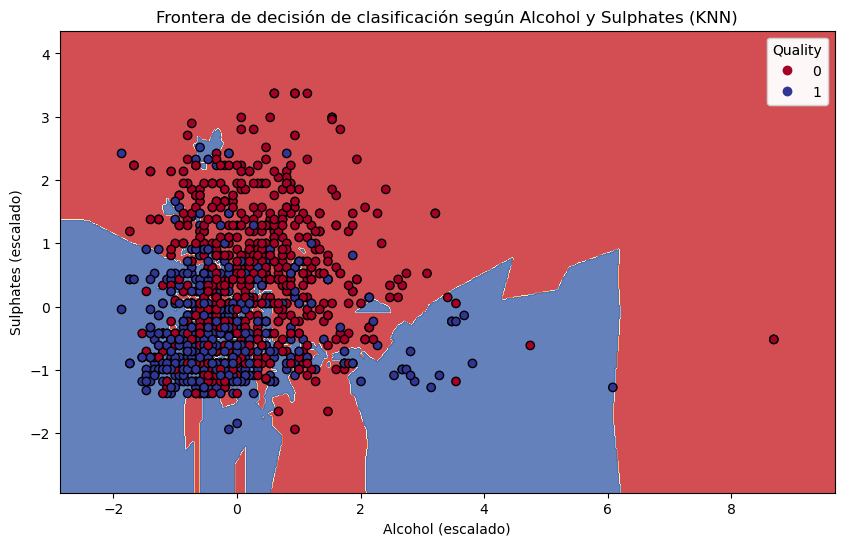

In [12]:
# Seleccionar solo las dos variables para visualizar la frontera de decisión (alcohol y sulphates)
X_train_2d = X_train_scaled[:, [9, 10]]  # alcohol es la columna 9 y sulphates es la columna 10
X_test_2d = X_test_scaled[:, [9, 10]]

# Entrenar el modelo KNN con estas dos variables
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predecir en cada punto de la malla
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Graficar los puntos de entrenamiento
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Alcohol (escalado)')
plt.ylabel('Sulphates (escalado)')
plt.title('Frontera de decisión de clasificación según Alcohol y Sulphates (KNN)')

# Leyenda
legend = plt.legend(*scatter.legend_elements(), title="Quality")
plt.gca().add_artist(legend)

plt.show()


Podemos ver en el gráfico que el modelo tiene buena eficiencia en la separación de los valores malo (0) y bueno (1) dentro del gráfico de sulphates vs alcohol obtenido. Cabe aclarar que es necesario escalar los valores de ambas variables debido a la diferencia que tienen ambos datos en crudo

Por último, decidimos hacer tres pruebas de desición del modelo para calificar un posible vino. Primero en base a las varaibles óptimas para obtener una calificación de bueno, segundo, una prueba donde nos permite demostrar que las variables alcohol y sulphates tienen peso sobre la desición de calidad; para ello, definimos todas las variables para una calidad mala exepto alcohol y sulphates donde asignamos valores optimos para una calidad buena. Por último, una prueba donde las variables serían indicativas de una calidad mala de vino:

In [13]:

'''Prueba con valores óptimos en todas las variables del vino'''

# Definir los valores de las características para un nuevo vino
nueva_muestra = {
    'fixed acidity': [10.0],           # Puedes modificar estos valores según lo que desees
    'volatile acidity': [0.4],
    'citric acid': [0.5],
    'residual sugar': [1.9],
    'chlorides': [0.06],
    'free sulfur dioxide': [9.0],
    'total sulfur dioxide': [25.0],
    'density': [0.994],
    'pH': [3.2],
    'sulphates': [0.8],
    'alcohol': [12.4]
}

# Crear un DataFrame con los valores de las características
df_nueva_muestra = pd.DataFrame(nueva_muestra)

# Normalizar las características de la nueva muestra utilizando el mismo scaler que se usó antes
df_nueva_muestra_scaled = scaler.transform(df_nueva_muestra)

# Usar el modelo entrenado para predecir la calidad del nuevo vino
prediccion = knn.predict(df_nueva_muestra_scaled)

# Convertir la predicción numérica a etiqueta
calidad_predicha = le.inverse_transform(prediccion)

# Mostrar la predicción
print(f"Calidad predicha para la nueva muestra: {calidad_predicha[0]}")


Calidad predicha para la nueva muestra: bueno


In [15]:

'''Prueba con valores de calidad mala del vino exepto alcohol y sulphates'''

# Definir los valores de las características para un nuevo vino
nueva_muestra = {
    'fixed acidity': [10.0],           # Puedes modificar estos valores según lo que desees
    'volatile acidity': [1.0],
    'citric acid': [0.1],
    'residual sugar': [3],
    'chlorides': [0.125],
    'free sulfur dioxide': [5.0],
    'total sulfur dioxide': [25.0],
    'density': [0.998],
    'pH': [3.51],
    'sulphates': [1.0],
    'alcohol': [13.0]
}

# Crear un DataFrame con los valores de las características
df_nueva_muestra = pd.DataFrame(nueva_muestra)

# Normalizar las características de la nueva muestra utilizando el mismo scaler que se usó antes
df_nueva_muestra_scaled = scaler.transform(df_nueva_muestra)

# Usar el modelo entrenado para predecir la calidad del nuevo vino
prediccion = knn.predict(df_nueva_muestra_scaled)

# Convertir la predicción numérica a etiqueta
calidad_predicha = le.inverse_transform(prediccion)

# Mostrar la predicción
print(f"Calidad predicha para la nueva muestra: {calidad_predicha[0]}")

Calidad predicha para la nueva muestra: bueno


In [16]:

'''Prueba con valores de calidad mala de vino'''

# Definir los valores de las características para un nuevo vino
nueva_muestra = {
    'fixed acidity': [11.0],           # Puedes modificar estos valores según lo que desees
    'volatile acidity': [1.0],
    'citric acid': [0.1],
    'residual sugar': [4.0],
    'chlorides': [0.125],
    'free sulfur dioxide': [5.0],
    'total sulfur dioxide': [25.0],
    'density': [0.998],
    'pH': [3.51],
    'sulphates': [0.5],
    'alcohol': [9.0]
}

# Crear un DataFrame con los valores de las características
df_nueva_muestra = pd.DataFrame(nueva_muestra)

# Normalizar las características de la nueva muestra utilizando el mismo scaler que se usó antes
df_nueva_muestra_scaled = scaler.transform(df_nueva_muestra)

# Usar el modelo entrenado para predecir la calidad del nuevo vino
prediccion = knn.predict(df_nueva_muestra_scaled)

# Convertir la predicción numérica a etiqueta
calidad_predicha = le.inverse_transform(prediccion)

# Mostrar la predicción
print(f"Calidad predicha para la nueva muestra: {calidad_predicha[0]}")

Calidad predicha para la nueva muestra: malo


Conclusiónes:
-Pudimos observar que el entrenamiento del modelo fue efectivo, con una alta tasa de predicción a pesar de que los valores crudos de estas variables son muy dificiles de manipular dado que son sistemas biológicos. 

-Pudimos corroborar que las variables sulphates y alcohol tienen gran ponderancia sobre la disición del modelo y podría ser de ayuda para civiles en caso de querer elegir buenos vinos por etiqueta. 

-Es preciso optimizar el modelo mediante herramientas más avanzadas (no vistas aún en nuestro curso) para poder mejorar la presición y escalar el uso del modelo a quienes decidan trabajar en la producción de vinos y manipular estas variables en el proceso de elaboración. 